# Thompson Sampling


## Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Dataset


In [2]:
dataset = pd.read_csv("../../datasets/10_ads_ctr_optimisation.csv")

## Implementing Thompson Sampling


In [3]:
import random

N = len(dataset.values)
d = 10
ads_selected = []
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(
            number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1
        )
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        number_of_rewards_1[ad] += 1
    else:
        number_of_rewards_0[ad] += 1
    total_reward += reward

## Visualising the Results


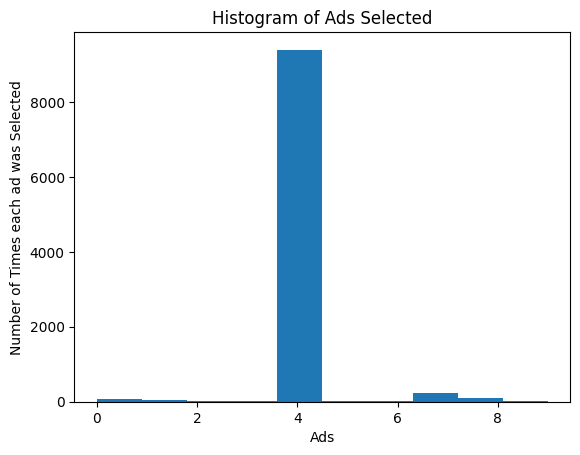

In [4]:
plt.hist(ads_selected)
plt.title("Histogram of Ads Selected")
plt.xlabel("Ads")
plt.ylabel("Number of Times each ad was Selected")
plt.show()